# Data Visualization using Funnels


## Content

- [Motivation](#Motivation)
- [Goal](#Goal)
- [Terms and Definitions](#Terms-and-Definitions)
- [Informal Introduction](#Informal-Introduction)
- [Formal Introduction](#Formal-Introduction)
- [Funnel Analysis using Bar Graph](#Funnel-Analysis-using-Bar-Graph)
- [Introduction to Plotly](#Introduction-to-Plotly)
- [Installing the library](#Installing-the-library)
- [Code walkthrough](#Code-walkthrough)
- [Colorful examples](#Colorful-examples)
- [Data preparation](#Data-preparation)
- [Goal](#Goal)
- [Understanding the data](#Understanding-the-data)
- [SQL to the rescue](#SQL-to-the-rescue)
- [SQL + Plotly + Bar Graph + Python](#SQL-+-Plotly-+-Bar-Graph-+-Python)
- [Further resources](#Further-resources)
- [References and Citations](#References-and-Citations)

![image3.png](image3.png)
![image2.png](image2.png)

## Motivation

Data Interpretation is the most important skills of data science. It is the lynchpin to the entire data science/machine learning pipeline.
Despite this many times we often neglect it and jump straight to implementing the "cool ml algorithms". This tutorial aims to rectify that. Funnel Analysis is a powerful data tool that can help us visually understand our product.

## Goal

By the end of the tutorial, you should be able to:
- Understand what funnel analysis is
- Perform basic analysis using Bar Graphs
- Learn Plotly library to make beautiful and insightful funnels
- Prepare data for funnel analysis using SQL



## Terms and Definitions

- __Funnel__: A funnel is a pipe with a wide (often conical) mouth and a narrow stem. It is used to channel liquid or fine-grained substances into containers with a small opening. 
- __Phases/Segment__: A funnel is divided into phases and segments. Just like an actual funnel defined above, it becomes narrower as we go down. For example for an ecommerce website, the phases may be ['Visit', 'Sign-up', 'Selection', 'Purchase', 'Review']. In each phase the number of people performing it typically reduces. 
- __Funnel Analysis__: It is a powerful way to calculate conversion rates on specific user behaviors.
- __Converstion__: A user is said to be converted if he/she takes part in all phases of a funnel. For our example, a user is said to be converted if he/she partakes in all of the ['Visit', 'Sign-up', 'Selection', 'Purchase', 'Review'].
- __Conversion rate__: Percentage of conversion.

## Informal Introduction

Suppose in the process of buying something from an ecommerce wesite one must typically go through the following phases ['Visit', 'Sign-up', 'Selection', 'Purchase', 'Review']. Funnel Analysis helps us answer questions like:
- How many visitors actually bought something ?
- How many visitors signed up ?
- How many people who bought also wrote a review.
- Determining the retention of users in your app
- Advanced user targeting (who are the users who buy for more than $100 and live in Pittsburgh)



## Formal Introduction

When an organization has a large number of moving parts which leads to an end result, analysing the effects of the individual moving parts on the end result becomes complicated. The end result may be a single goal like total sales or it can be a set of sequence of events.
Analysing these series of steps that eventually lead to a predefined goal is called funnel analysis. To give a more concrete example suppose there is a big ecommerce firm. The end goal for any organization would be maximizing the profits which is directly related to the amount of "purchases" made on the website. The typical states/phases in purchasing something would be roughly 1. Visiting 2. Signing up 3. Searching/Selecting 4. Purchasing. These phases can be thought of as segments of a funnel. As one goes down a funnel, it typically becomes narrower. This is the origin of the word funnel. Funnel analysis is one of the most powerful ways to analyse how many people are satisfying the end goal of an organization (purchasing something in this case).
The origin of the term funnel analysis comes from the nature of a funnel where individuals will enter the funnel, yet only a small number of them will perform the intended goals - Wikipedia.

![image1.png](image1.png)


It is not necessary for the funnel to have the shape shown on the right. That shape merely justifies the name and the actual anaysis is independent of the shape.
Now suppose that you are hired by a large company to try and improve their online market place. A very vague requirement right ?. From my limited experience that is how most of the requirements in the industry are anyways.
What can you do ?. Lets take a small example. 

## Funnel Analysis using Bar Graph

Lets not worry about how the data is being stored for now and rather focus on the process of performing the analysis itself.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
BAR_WIDTH = 0.5

def funnel(phases, values):
    """ Plots funnel as a bar graph
    
    Args:
        phases (list): List of phases
        values (list): values for each phase
                        Must have the same size as phases
    """

    percentages = []
    percentages.append(phases[0])
    for i in range(1, len(phases)):
        if values[i-1] == 0:
            temp = 0
            percentages.append('{}\n({:.2%})'.format(phases[i], temp))
            continue
        temp = (values[i]/values[i-1])
        percentages.append('{}\n({:.2%})'.format(phases[i], temp))
        
    fig = plt.figure()
    plt.bar(range(len(values)), values, BAR_WIDTH, color='black')
    plt.title('Funnel')
    plt.xlabel('Phases')
    plt.ylabel('Number of Users')
    plt.xticks([i for i in range(len(phases))], percentages)


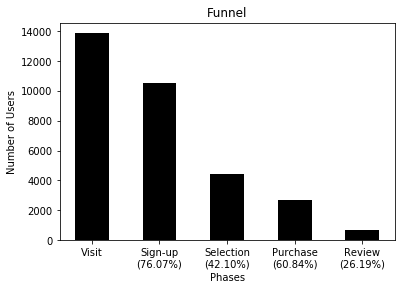

In [2]:
phases = ['Visit', 'Sign-up', 'Selection', 'Purchase', 'Review']
values = [13873, 10553, 4443, 2703, 708]


funnel(phases, values)

As can be seen above from the rendering, it may not be necessary for the visualization to be in the shape of the funnel.
From the bar chart, it can be seen that only about 42% of the people who sign up actually surf through the website and select products. This could mean that there is a problem that needs to be solved from "sign up" phase to "selection" phase.
Similarly, only about 26% of the people who purchase are actually writing reviews about the products they are buying. This means that some steps may need to be taken to pursuade people to leave feedback for example sending they email remainders etc. This is important for an e-commerce website since higher customer engagement means a more robust community.

## Introduction to Plotly

Let us look at a cool way to visualize such relations. We will briefly look at python library called plotly.Plotly is an open source tool for composing, editing, and sharing interactive data visualization via the Web. It has a wide range of features that can be used to render data visually. It looks much better than the typical matplotlib diagrams. Lets walk through an example to create a funnel.

## Installing the library

Below are the long series of steps to install.<br><br>
pip install plotly.<br><br>
Thats it !!!.



## Code walkthrough

In [7]:
import plotly
plotly.__version__

'2.5.0'

In [8]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [9]:
import plotly.plotly as py
from plotly import graph_objs as go
    

def plotly_plot(colors, phases, values, paper_bgcolor='rgba(240,240,240,1)', plot_bgcolor='rgba(240,240,240,1'):

    """ Plots funnel using plotly
    
    Args:
        colors: rgb specification of the colors of the funnel segments
        phases (list): List of phases
        values (list): values for each phase
                        Must have the same size as phases
        paper_bgcolor: background color of the entire canvas
        plot_bgcolor: background color of the plot
    """


    print(paper_bgcolor)
    number_phase = len(phases)
    plot_width = 400

    section_h = 100
    section_d = 5

    unit_width = plot_width / max(values)

    phase_w = [int(value * unit_width) for value in values]

    height = section_h * number_phase + section_d * (number_phase - 1)

    shapes = []

    label_y = []

    for i in range(number_phase):
            if (i == number_phase-1):
                    points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
            else:
                    points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

            path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

            shape = {
                    'type': 'path',
                    'path': path,
                    'fillcolor': colors[i],
                    'line': {
                        'width': 1,
                        'color': colors[i]
                    }
            }
            shapes.append(shape)
        
            label_y.append(height - (section_h / 2))

            height = height - (section_h + section_d)

    label_trace = go.Scatter(
        x=[-350]*number_phase,
        y=label_y,
        mode='text',
        text=phases,
        textfont=dict(
            color='rgb(230, 190, 255)',
            size=15
        )
    )
 
    value_trace = go.Scatter(
        x=[350]*number_phase,
        y=label_y,
        mode='text',
        text=values,
        textfont=dict(
            color='rgb(230, 190, 255)',
            size=15
        )
    )

    data = [label_trace, value_trace]
 
    layout = go.Layout(
        title="<b>Funnel Chart</b>",
        titlefont=dict(
            size=20,
            color='rgb(230, 190, 255)'
        ),
        shapes=shapes,
        height=560,
        width=800,
        showlegend=False,
        paper_bgcolor=paper_bgcolor,
        plot_bgcolor=plot_bgcolor,
        xaxis=dict(
            showticklabels=False,
            zeroline=False,
        ),
        yaxis=dict(
            showticklabels=False,
            zeroline=False
        )
    )
 
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

## Colorful examples

In [26]:
phases = ['Visit', 'Sign-up', 'Selection', 'Purchase', 'Review']
values = [13873, 10553, 4443, 2703, 708]
# color of individual funnels
colors1 = ['rgb(17,31,77)', 'rgb(242,244,247)', 'rgb(228,58,25)', 'rgb(50,50,50)', 'rgb(2,2,5)']
# colors2 = ['rgb(50,50,50)', 'rgb(133,89,165)', 'rgb(109,177,147)', 'rgb(244,229,194)', 'rgb(171,237,216)']
colors3 = ['rgb(228,237,219)', 'rgb(48,118,114)', 'rgb(20,77,83)', 'rgb(26,60,64)', 'rgb(46,56,63)']
plotly_plot(colors1, phases, values)
# plotly_plot(colors2)
plotly_plot(colors3, phases, values)


## Pyplot image
![colorful_example_1.png](colorful_example_1.png)



This image is statically rendered for those who do not want to execute the cells. If you execute the above cell this plot will show up again in addition to the static image displayed above. For more dynamic plot, please run the notebook titled Tutorial_nbview_compatible.ipynb

## Pyplot image

![colorful_example_2.png](colorful_example_2.png)




This image is statically rendered for those who do not want to execute the cells. If you execute the above cell this plot will show up again in addition to the static image displayed above. For more dynamic plot, please run the notebook titled Tutorial_nbview_compatible.ipynb


Use the following two resources to select the colors for your funnel.
- https://www.webpagefx.com/web-design/hex-to-rgb/
- http://colorhunt.co/c/111086

## Data preparation

Now that we have understood the process of performing the analysis itself, we can start paying attention to the data formatting etc which we had neglected earlier.
We are given a csv file that contains user data that simulates the activities of users on an ecommerce website.

## Goal
1. We want to process the data so that it can be used to perform funnel analysis. Having the right format/structure of data can make the analysis very easy (I realized this first hand while writing the tutorial).
2. We will read the csv file into an in memory database and do all further analysis on that.


In [11]:
import csv
import sqlite3
import pandas as pd



def load_data_sqlite3(conn, file) :
    """ Load twitter data in the three files as tables into an in-memory SQLite database
    Input:
        conn (sqlite3.Connection) : Connection object corresponding to the database; used to perform SQL commands.
        users_filepath (str) : absolute/relative path to users.csv file
        edges_filepath (str) : absolute/relative path to edges.csv file
        tweets_filepath (str) : absolute/relative path to tweets.csv file
    Output:
        None
    """
    
    c = conn.cursor()
    c.execute('''CREATE TABLE users (user_id INTEGER, timestamp INTEGER, event TEXT)''')
    with open(file, encoding='utf-8') as csvfile1:
        dr = csv.DictReader(csvfile1)
        to_db_1 = [(i['user_id'], i['timestamp'], i['event']) for i in dr]
    c.executemany("INSERT INTO users (user_id, timestamp, event) VALUES (?, ?, ?);", to_db_1)

    conn.commit()
    pass



In [12]:
df = pd.read_csv("test.csv")
print(df.head())
conn = sqlite3.connect(":memory:")
conn.text_factory = str
load_data_sqlite3(conn, 'test.csv')
cursor = conn.cursor()


   user_id  timestamp  event
0    10802      17169  Visit
1    14952      19428  Visit
2     3122       7487  Visit
3    11058      12885  Visit
4    17100      22908  Visit


## Understanding the data 

We will first try to understand and get a feel of the kind of data we are dealing with since that is very important. There are quite a few ways of doing this. We will primarily explore two ways:-
1. Using pandas
2. Using SQL

Using pandas has its own advantages. pandas has a wealth of built-in functions that can help us describe the data. For example df.describe, df.head, df.head() etc to name a few.
Then there is SQL which is a beast when it comes to data manipulation. A quick insight- When I was writing this tutorial, I was initially using pandas to do bulk of the data manipulation. It took the code to well over 100 line. I took a step back and was looked at it from SQL's perspective- 4 lines. Number of lines dont really matter much, but SQL was much more elegant in handling the manipulations.

Feel free to try out different methods of exploring the data.

In [13]:
def load_data_pandas(users_filepath):
    """ Loads the Twitter data from the csv files into Pandas dataframes
    Input:
        users_filepath (str) : absolute/relative path to users.csv file
    Output:
        (pd.DataFrame) : A dataframe.
    """
    users = pd.read_csv(users_filepath, keep_default_na = False)
    return users


In [14]:
tables = cursor.execute('select name from sqlite_master where type = \'table\'')
print("The database has the following tables: ", [table for table in tables])

results = cursor.execute('select * from users')
names = [description[0] for description in cursor.description]
print("The table has the following column names: ", names)
df = load_data_pandas("test.csv")
print("The number of possible events are: ", len(set(df['event'])))
print("The possible events are: ", set(df['event']))


The database has the following tables:  [('users',)]
The table has the following column names:  ['user_id', 'timestamp', 'event']
The number of possible events are:  5
The possible events are:  {'Selection', 'Purchase', 'Sign up', 'Review', 'Visit'}


## SQL to the rescue
Now that we have a feel of the data, let us proceed with our Goal described above. For this we need to essentially bring our data to look in terms of labels = ['Visit', 'Sign-up', 'Selection', 'Purchase', 'Review'] and values = [13873, 10553, 4443, 2703, 708] as we have seen in the code at the starting of the tutorial.

After playing around with pandas and SQL as I mentioned in the markdown couple of cells above, SQL was much more elegant in handling complex data transformations. Let us define a few "convertions we want to acheive".

- What is the total conversion rate ?
- What is the conversion rate from visiting to review barring sign up ?
- How many customers came back for a second ?

## SQL + Plotly + Bar Graph + Python


In [15]:

def format_data(phases):
    
    l = len(phases)
    
    part1 = 'select '
    for i in range(0,l-1):
        part1 += 'count(distinct d'+str(i+1)+'.user_id) as NumEvent'+str(i+1)+',\n'
    part1 += 'count(distinct d'+str(l)+'.user_id) as NumEvent'+str(l)       
    part2 = '\nfrom users d1 left join \n'
    for i in range(1, l-1):
        part2 += 'users d'+str(i+1)+'\non d'+str(i+1)+'.user_id = d'+str(i)+'.user_id and d'+str(i+1)
        part2 +='.timestamp > d'+str(i)+'.timestamp and d'+str(i+1)+'.event =\''+phases[i]+'\' left join\n'
    part2 += 'users d'+str(l)+'\non d'+str(l)+'.user_id = d'+str(l-1)+'.user_id and d'+str(l)
    part2 +='.timestamp > d'+str(l-1)+'.timestamp and d'+str(l)+'.event =\''+phases[l-1]+'\''
    part3 = 'where d1.event =\''+phases[0]+'\''
    
    query = part1+part2+part3
    print('----------------------------------------------------------------------------------------------------\n')
    print("This is how the query looks:\n")
    print(query)
    print('----------------------------------------------------------------------------------------------------\n')    
    result = conn.cursor().execute(query)
    for row in result:
        print ("\n\n\nThe conversion from visiting the website to writing reviews is as follows: ",row)
        values = list(row)
    return values
    


## Total conversion rate

----------------------------------------------------------------------------------------------------

This is how the query looks:

select count(distinct d1.user_id) as NumEvent1,
count(distinct d2.user_id) as NumEvent2,
count(distinct d3.user_id) as NumEvent3,
count(distinct d4.user_id) as NumEvent4,
count(distinct d5.user_id) as NumEvent5
from users d1 left join 
users d2
on d2.user_id = d1.user_id and d2.timestamp > d1.timestamp and d2.event ='Sign-up' left join
users d3
on d3.user_id = d2.user_id and d3.timestamp > d2.timestamp and d3.event ='Selection' left join
users d4
on d4.user_id = d3.user_id and d4.timestamp > d3.timestamp and d4.event ='Purchase' left join
users d5
on d5.user_id = d4.user_id and d5.timestamp > d4.timestamp and d5.event ='Review'where d1.event ='Visit'
----------------------------------------------------------------------------------------------------




The conversion from visiting the website to writing reviews is as follows:  (217, 0, 0, 0, 0)


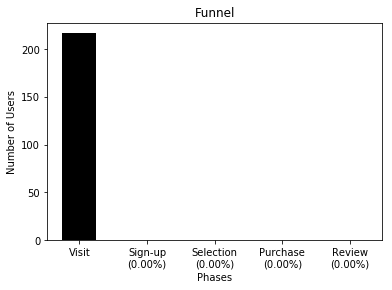

In [25]:
phases = ['Visit', 'Sign-up', 'Selection', 'Purchase', 'Review']
colors = ['rgb(17,31,77)', 'rgb(242,244,247)', 'rgb(228,58,25)', 'rgb(50,50,50)', 'rgb(2,2,5)']
values = format_data(phases)
funnel(phases, values)


We can easily see that there is 0 conversion from start to end which may be a source of concern. Since the sign-up process is the first in the path, that could essentially be the bottle neck. As we will see in the next example that indeed is the case since when we exclude the sign-up process from the conversion process, we find there is some conversion.

In [ ]:
plotly_plot(colors,phases,values)

## Pyplot image

![total_conversion.png](total_conversion.png)

This image is statically rendered for those who do not want to execute the cells. If you execute the above cell this plot will show up again in addition to the static image displayed above. For more dynamic plot, please run the notebook titled Tutorial_nbview_compatible.ipynb

## Conversion rate from visiting to review excluding sign up

----------------------------------------------------------------------------------------------------

This is how the query looks:

select count(distinct d1.user_id) as NumEvent1,
count(distinct d2.user_id) as NumEvent2,
count(distinct d3.user_id) as NumEvent3,
count(distinct d4.user_id) as NumEvent4
from users d1 left join 
users d2
on d2.user_id = d1.user_id and d2.timestamp > d1.timestamp and d2.event ='Selection' left join
users d3
on d3.user_id = d2.user_id and d3.timestamp > d2.timestamp and d3.event ='Purchase' left join
users d4
on d4.user_id = d3.user_id and d4.timestamp > d3.timestamp and d4.event ='Review'where d1.event ='Visit'
----------------------------------------------------------------------------------------------------




The conversion from visiting the website to writing reviews is as follows:  (217, 157, 46, 3)


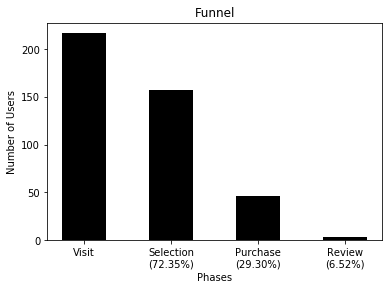

In [23]:
phases = ['Visit', 'Selection', 'Purchase', 'Review']
colors = ['rgb(253,164,3)', 'rgb(232,117,26)', 'rgb(197,19,80)', 'rgb(138,18,83)', 'rgb(2,2,5)']
values = format_data(phases)
paper_bgcolor='rgba(44,58,71,1)'
plot_bgcolor='rgba(44,58,71,1)'

funnel(phases, values)

In [ ]:
plotly_plot(colors,phases,values, paper_bgcolor, plot_bgcolor)


## Pyplot image
![visit_review.png](visit_review.png)

This image is statically rendered for those who do not want to execute the cells. If you execute the above cell this plot will show up again in addition to the static image displayed above. For more dynamic plot, please run the notebook titled Tutorial_nbview_compatible.ipynb

## Buying again

The next question we will see is quite interesting. We want to know how many customers are coming back to the ecommerce website to buy again ?. The framework we have developed above lets us answer all such questions without changing the code as shown below.

----------------------------------------------------------------------------------------------------

This is how the query looks:

select count(distinct d1.user_id) as NumEvent1,
count(distinct d2.user_id) as NumEvent2
from users d1 left join 
users d2
on d2.user_id = d1.user_id and d2.timestamp > d1.timestamp and d2.event ='Purchase'where d1.event ='Purchase'
----------------------------------------------------------------------------------------------------




The conversion from visiting the website to writing reviews is as follows:  (372, 83)


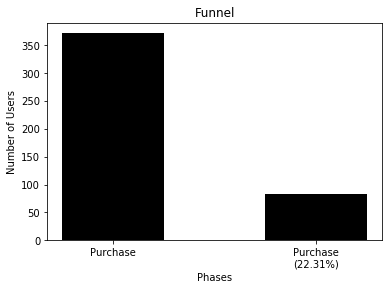

In [24]:
phases = ['Purchase','Purchase']
colors = ['rgb(253,164,3)', 'rgb(232,117,26)', 'rgb(197,19,80)', 'rgb(138,18,83)', 'rgb(2,2,5)']
values = format_data(phases)
paper_bgcolor='rgba(44,58,71,1)'
plot_bgcolor='rgba(44,58,71,1)'

funnel(phases, values)

In [22]:
plotly_plot(colors,phases,values, paper_bgcolor, plot_bgcolor)


## Pyplot image
![purchase_purchasse.png](purchase_purchasse.png)


This image is statically rendered for those who do not want to execute the cells. If you execute the above cell this plot will show up again in addition to the static image displayed above. For more dynamic plot, please run the notebook titled Tutorial_nbview_compatible.ipynb

## Further resources

There is more to funnel analysis like path computation, segmented funnels etc. Below are some of the resources that I found as useful addition to this tutorial.

- Segmented funnels: https://moderndata.plot.ly/segmented-funnel-charts-in-python-using-plotly/
- SQL queris for funnel analysis https://blog.statsbot.co/sql-queries-for-funnel-analysis-35d5e456371d
- Funnel analysis in javascript: https://keen.io/docs/compute/intro-to-funnel-analysis/
- Online database analyser: https://sqliteonline.com/#/

If you want to plot the funnels like the ones shown in this tutorial, the colors can be tested using the following:
- https://www.webpagefx.com/web-design/hex-to-rgb/
- http://colorhunt.co/c/111086



## References and Citations

- https://en.wikipedia.org/wiki/Funnel_analysis
- https://plot.ly/python/getting-started/#start-plotting-online
- https://plot.ly/python/funnel-charts/
- https://stats.stackexchange.com/questions/89475/how-would-you-visualize-a-segmented-funnel-and-could-you-do-it-with-python
- https://stackoverflow.com/questions/26453923/how-can-one-calculate-funnel-analysis-from-a-sql-table-of-raw-events
